This notebook would be used for testing the model on a video. But first, we'll have to load our exported model.

In [1]:
# Mount my Google Drive for Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Move to uploaded tensorflow directory in my Google Drive
%cd '/content/gdrive/My Drive/tensorflow/'

/content/gdrive/My Drive/tensorflow


In [3]:
# Check directory contents to see if everything is uploaded properly
!ls

addons	models	scripts  workspace


In [4]:
# Install dependencies needed for Object Detection API
!apt-get install protobuf-compiler python-lxml python-pil
!pip install Cython pandas tf-slim lvis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,614 kB of archives.
After this operation, 8,908 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pkg-resources all 39.0.1-2 [128 kB]
Get:3 http:/

In [5]:
# Compile Protobuf libraries
%cd '/content/gdrive/My Drive/tensorflow/models/research/'
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/My Drive/tensorflow/models/research


In [6]:
# Setup environment for Google Colab
import os
import sys
os.environ['PYTHONPATH']+=":/content/gdrive/My Drive/tensorflow/models"
sys.path.append("/content/gdrive/My Drive/tensorflow/models/research")

In [7]:
# Build and install libraries for Object Detection API in "tensorflow/models/research"
!python setup.py build
!python setup.py install

running build
running build_py
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_predictor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/calibration_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/center_net_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/flexible_grid_anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/fpn_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_pb2.py -> b

In [8]:
# Test installation for Object Detection API
%cd '/content/gdrive/My Drive/tensorflow/models/research/object_detection/builders/'
!python model_builder_tf2_test.py
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
print('Done')

/content/gdrive/My Drive/tensorflow/models/research/object_detection/builders
2021-10-13 11:24:08.869003: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-13 11:24:08.869068: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (5320b1425a2d): /proc/driver/nvidia/version does not exist
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W1013 11:24:09.179590 140361105704832 model_builder.py:1091] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.71s
I1013 11:24:09.586560 140361105704832 test_util.py:2189] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.71s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderT

Now that we set up our environment, we'll try loading our exported model.

In [9]:
# Loading exported model for testing
%cd '/content/gdrive/My Drive/tensorflow/workspace/object_detector/'
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
PATH_TO_SAVED_MODEL='/content/gdrive/My Drive/tensorflow/workspace/object_detector/exported_models/my_test_model/saved_model'
print('Loading model...', end='')
# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

/content/gdrive/My Drive/tensorflow/workspace/object_detector
Loading model...Done!


We'll now check to see if our model still works for static images.

In [10]:
# Loading our label map (roadsign_labels.pbtxt)
category_index = label_map_util.create_category_index_from_labelmap("/content/gdrive/My Drive/tensorflow/workspace/object_detector/annotations/roadsign_labels.pbtxt", use_display_name=True)

In [11]:
def get_img_list_from_dir(path):
  img_list = []
  for file in os.listdir(path):
    if file.endswith('.png'):
      img_list.append(path + file)
  return img_list

In [12]:
# Loading images from images/test directory
img_all = get_img_list_from_dir('/content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/')

In [13]:
# Import random for image selection
import random

# Select 20 images at random
img = random.sample(img_all, 20)

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road787.png... Done


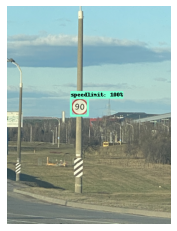

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road646.png... Done


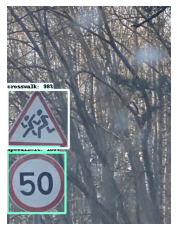

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road19.png... Done


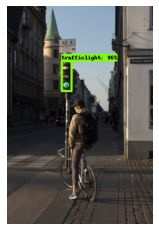

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road159.png... Done


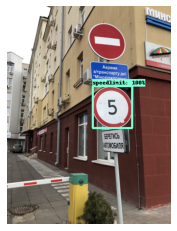

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/augmented_yield63.png... Done


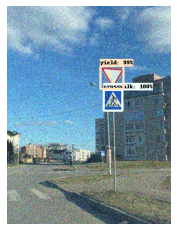

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road728.png... Done


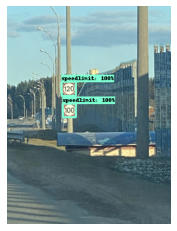

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/augmented_yield93.png... Done


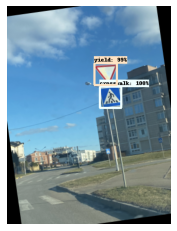

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road583.png... Done


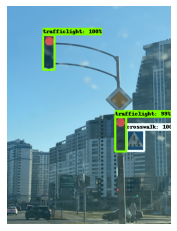

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road638.png... Done


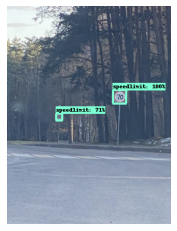

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road796.png... Done


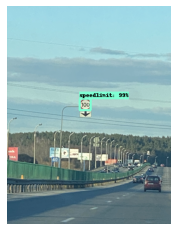

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road445.png... Done


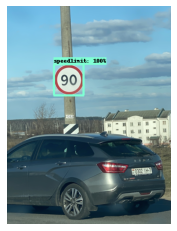

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road756.png... Done


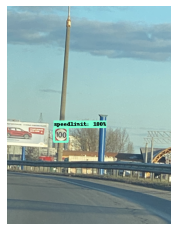

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road199.png... Done


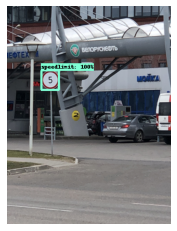

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road80.png... Done


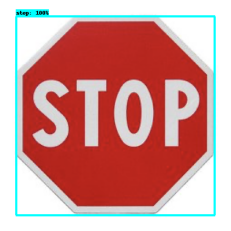

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road285.png... Done


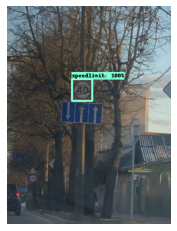

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road452.png... Done


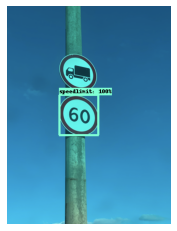

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road503.png... Done


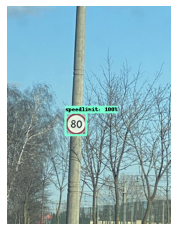

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/augmented_yield17.png... Done


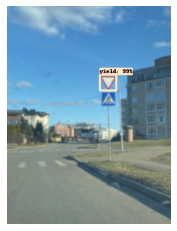

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road69.png... Done


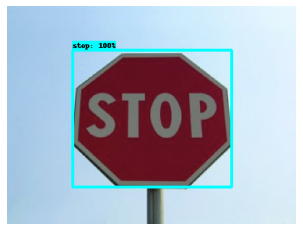

Running inference for /content/gdrive/My Drive/tensorflow/workspace/object_detector/images/test/road162.png... Done


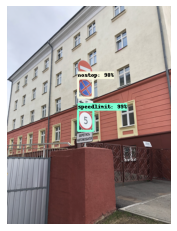

In [14]:
# Running inference on randomly selected images
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Takes image and loads them with RGB scale
def load_image_into_numpy_array(path):
  return np.array(Image.open(path).convert('RGB'))

for image_path in img:
  print('Running inference for {}... '.format(image_path), end='')
  image_np = load_image_into_numpy_array(image_path)

  input_tensor = tf.convert_to_tensor(image_np)
  input_tensor = input_tensor[tf.newaxis, ...]
  detections = detect_fn(input_tensor)
  num_detections = int(detections.pop('num_detections'))
  detections = {key:value[0,:num_detections].numpy() for key,value in detections.items()}
  detections['num_detections'] = num_detections
  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
  image_np_with_detections = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,
          min_score_thresh=.7,
          agnostic_mode=False)
  %matplotlib inline
  plt.imshow(image_np_with_detections)
  plt.axis('off')
  print('Done')
  plt.show()

Now that we know that our model is working properly, we'll try this now using a video.

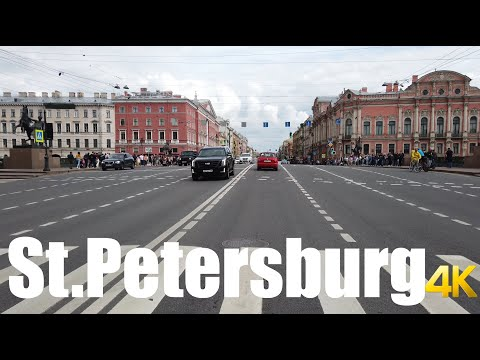

In [15]:
# This is the video we're going to process; a test clip has already been uploaded
# to the Google Drive ('test_video.mp4')
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("vKD8_m88tuk", width=500)
display(video)

In [16]:
# Import Dependencies for open-cv and processing
import cv2
from tqdm import tqdm
from time import sleep

video = cv2.VideoCapture('/content/gdrive/My Drive/tensorflow/workspace/object_detector/videos/test_video.mp4')
num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

In [17]:
# Run inference on video frame by frame
frames = []
while True:
    ret, frame = video.read()
    if ret == True:
        # Reduce video size to 800x600 pixels
        frame = cv2.resize(frame, (800, 600))
        # Convert video color to RGB
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Process frame for object detection model
        image_np = np.array(frame)
        input_tensor = tf.convert_to_tensor(image_np)
        input_tensor = input_tensor[tf.newaxis, ...]
        detections = detect_fn(input_tensor)
        num_detections = int(detections.pop('num_detections'))
        detections = {key:value[0,:num_detections].numpy() for key,value in detections.items()}
        detections['num_detections'] = num_detections
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
        image_np_with_detections = image_np.copy()
        viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes'],
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=100,
            min_score_thresh=.7,
            agnostic_mode=False)
        frames.append(image_np_with_detections)
        # Set progression bar based on max number of frames from video
        pbar = tqdm(total=num_frames, leave=True)
        pbar.update(len(frames))
        sleep(0.2)
        #plt.figure(figsize=(20, 15))
        #plt.imshow(image_np_with_detections)
        #plt.axis('off')
        #plt.show()
    else:
        print('Video not present!')
        break
pbar.close()

video.release()
cv2.destroyAllWindows()

  0%|          | 2/1798 [00:03<45:22,  1.52s/it]

  0%|          | 4/1798 [00:02<22:11,  1.35it/s]

  0%|          | 6/1798 [00:02<14:36,  2.04it/s]

  0%|          | 8/1798 [00:02<10:59,  2.71it/s]

  1%|          | 10/1798 [00:03<09:00,  3.31it/s]

  1%|          | 12/1798 [00:03<07:30,  3.97it/s]

  1%|          | 14/1798 [00:03<06:22,  4.66it/s]

  1%|          | 16/1798 [00:02<05:31,  5.37it/s]

  1%|          | 18/1798 [00:02<04:54,  6.05it/s]

  1%|          | 20/1798 [00:02<04:24,  6.71it/s]

  1%|          | 22/1798 [00:03<04:06,  7.20it/s]

  1%|▏         | 24/1798 [00:03<03:45,  7.88it/s]

  1%|▏         | 26/1798 [00:02<03:24,  8.68it/s]

  2%|▏         | 28/1798 [00:03<03:09,  9.33it/s]

  2%|▏         | 30/1798 [00:03<02:57,  9.94it/s]

  2%|▏         | 32/1798 [00:03<02:46, 10.59it/s]

  2%|▏         | 34/1798 [00:03<02:38, 11.12it/s]

  2%|▏         | 36/1798 [00:02<02:24, 12.17it/s]

  2%|▏         | 38/1798 [00:03<02:21, 12.41it/s]

  2%|▏         | 40/1798 [00:02<02:

Video not present!


In [18]:
# Checking number of frames process; this should match num_frames
len(frames) == num_frames

True

In [19]:
# Create video of object detection results
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
output_video = cv2.VideoWriter('video_results.mp4', fourcc, 30, (800, 600))

for i in range(len(frames)):
    output_video.write(cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB))

output_video.release()
cv2.destroyAllWindows()

In [20]:
# Download the results
from google.colab import files
files.download('video_results.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>